---
# Final Project: Yelp Review
### Tao Tang (University of Notre Dame)

---

## Yelp Data

For the final project, you will analyze data that has been made publicly available for educational and academic purposes. The data contains 3 main tables we will analyze:

  + `yelp_academic_dataset_business.csv` - contains information about  a subset of businesses having at least one Yelp review. Every distinct business has a unique `business_id`
  
  + `yelp_academic_dataset_review.csv` - contains a subset of Yelp reviews with a `business_id` indicating what business the review is for and a `user_id` to identify the user leaving the review
  
  + `yelp_academic_dataset_user.csv` - contains a subset of Yelp users identified by `user_id`
   

## Setup and Load the Data

In [1]:
# Options to display more rows and columns
# DO NOT REMOVE

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 100)

In [2]:
# Load the libraries you need...
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/tt/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Load the data

business_data = pd.read_csv(r'data-sets/yelp_academic_dataset_business.csv')
business_data.head()

,address,attributes,attributes.AcceptsInsurance,attributes.AgesAllowed,attributes.Alcohol,attributes.Ambience,attributes.BYOB,attributes.BYOBCorkage,attributes.BestNights,attributes.BikeParking,attributes.BusinessAcceptsBitcoin,attributes.BusinessAcceptsCreditCards,attributes.BusinessParking,attributes.ByAppointmentOnly,attributes.Caters,attributes.CoatCheck,attributes.Corkage,attributes.DietaryRestrictions,attributes.DogsAllowed,attributes.DriveThru,attributes.GoodForDancing,attributes.GoodForKids,attributes.GoodForMeal,attributes.HairSpecializesIn,attributes.HappyHour,attributes.HasTV,attributes.Music,attributes.NoiseLevel,attributes.Open24Hours,attributes.OutdoorSeating,attributes.RestaurantsAttire,attributes.RestaurantsCounterService,attributes.RestaurantsDelivery,attributes.RestaurantsGoodForGroups,attributes.RestaurantsPriceRange2,attributes.RestaurantsReservations,attributes.RestaurantsTableService,attributes.RestaurantsTakeOut,attributes.Smoking,attributes.WheelchairAccessible,attributes.WiFi,business_id,categories,city,hours,hours.Friday,hours.Monday,hours.Saturday,hours.Sunday,hours.Thursday,hours.Tuesday,hours.Wednesday,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,1314 44 Avenue NE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,True,"{'garage': False, 'street': True, 'validated':...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,True,NaN,average,NaN,False,casual,NaN,False,True,2.0,True,NaN,True,NaN,NaN,NaN,Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,NaN,11:0-21:0,8:30-17:0,11:0-21:0,NaN,11:0-21:0,11:0-21:0,11:0-21:0,1,51.091813,-114.031675,Minhas Micro Brewery,NaN,T2E 6L6,24,4.0,AB
1,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN,False,NaN,True,"{'garage': False, 'street': True, 'validated':...",NaN,True,NaN,NaN,NaN,True,False,NaN,True,"{'dessert': False, 'latenight': False, 'lunch'...",NaN,NaN,False,NaN,NaN,NaN,True,casual,NaN,False,True,2.0,False,False,True,NaN,True,no,AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,NaN,17:0-23:0,NaN,17:0-23:0,17:0-23:0,NaN,NaN,NaN,0,35.960734,-114.939821,CK'S BBQ & Catering,NaN,89002,3,4.5,NV
2,1335 rue Beaubien E,NaN,NaN,NaN,beer_and_wine,"{'romantic': False, 'intimate': False, 'classy...",NaN,NaN,NaN,True,NaN,False,"{'garage': False, 'street': False, 'validated'...",NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,True,"{'dessert': False, 'latenight': False, 'lunch'...",NaN,NaN,True,NaN,average,NaN,False,casual,NaN,False,True,2.0,True,True,False,NaN,NaN,free,O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandw...",Montréal,NaN,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,5,4.0,QC
3,211 W Monroe St,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,33.449999,-112.076979,Geico Insurance,NaN,85003,8,1.5,AZ
4,2005 Alyth Place SE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping...",Calgary,NaN,8:0-17:0,8:0-17:0,NaN,NaN,8:0-17:0,8:0-17:0,8:0-17:0,1,51.035591,-114.027366,Action Engine,NaN,T2H 0N5,4,2.0,AB


# 1 - Explore and Clean Data

### Problem 1

<span  style="color:purple; font-size:16px">The `yelp_academic_dataset_business.csv` data has been loaded for you as a Pandas DataFrame called `business_data`. Determine the  number of rows and columns of the data. Is the data in a tidy format? Briefly explain your reasoning about why you think the data is/is not tidy.</span>

In [4]:
business_data.shape

(188593, 61)

#### Written Answer:

The data is not in a tidy format.
+ Mutile variables are stored in one column.
+ Variables are stored in both rows and columns.

### Problem 2

<span  style="color:purple; font-size:16px">Determine the number of columns of each data type in `business_data`: object, float64, int64. </span>

In [5]:
business_data.dtypes.value_counts()

object     53
float64     6
int64       2
dtype: int64

### Problem 3

<span  style="color:purple; font-size:16px">Create a Pandas Series containing the proportion of missing values in each column of `business_data`.</span>

In [6]:

business_data.isnull().mean().sort_values(ascending = False)

attributes                               1.000000
hours                                    1.000000
attributes.DietaryRestrictions           0.999268
attributes.Open24Hours                   0.998134
attributes.AgesAllowed                   0.997895
attributes.RestaurantsCounterService     0.997895
attributes.Corkage                       0.996516
attributes.BYOB                          0.995169
attributes.BYOBCorkage                   0.992529
attributes.HairSpecializesIn             0.990026
attributes.DriveThru                     0.964187
attributes.BestNights                    0.963710
attributes.Smoking                       0.956981
attributes.CoatCheck                     0.954765
attributes.Music                         0.953302
attributes.GoodForDancing                0.951419
attributes.HappyHour                     0.950767
attributes.AcceptsInsurance              0.938115
attributes.BusinessAcceptsBitcoin        0.932797
attributes.DogsAllowed                   0.927458


<span  style="color:purple; font-size:16px">How many variables have no missing values?</span>

In [7]:

business_data.notnull().mean().sort_values(ascending = False)

state                                    1.000000
review_count                             1.000000
stars                                    1.000000
name                                     1.000000
is_open                                  1.000000
business_id                              1.000000
longitude                                0.999968
latitude                                 0.999968
city                                     0.999947
categories                               0.997131
postal_code                              0.996389
address                                  0.959580
hours.Thursday                           0.754848
hours.Wednesday                          0.752112
hours.Friday                             0.751862
hours.Tuesday                            0.745558
attributes.BusinessAcceptsCreditCards    0.744413
hours.Monday                             0.703955
hours.Saturday                           0.664797
attributes.RestaurantsPriceRange2        0.567996


**There are 6 variables have no missing values.**

_____

### Problem 4: (5 points)

<span  style="color:purple; font-size:16px">Use an appropriate visualization technique to analyze the missingness in `business_data`.</span>

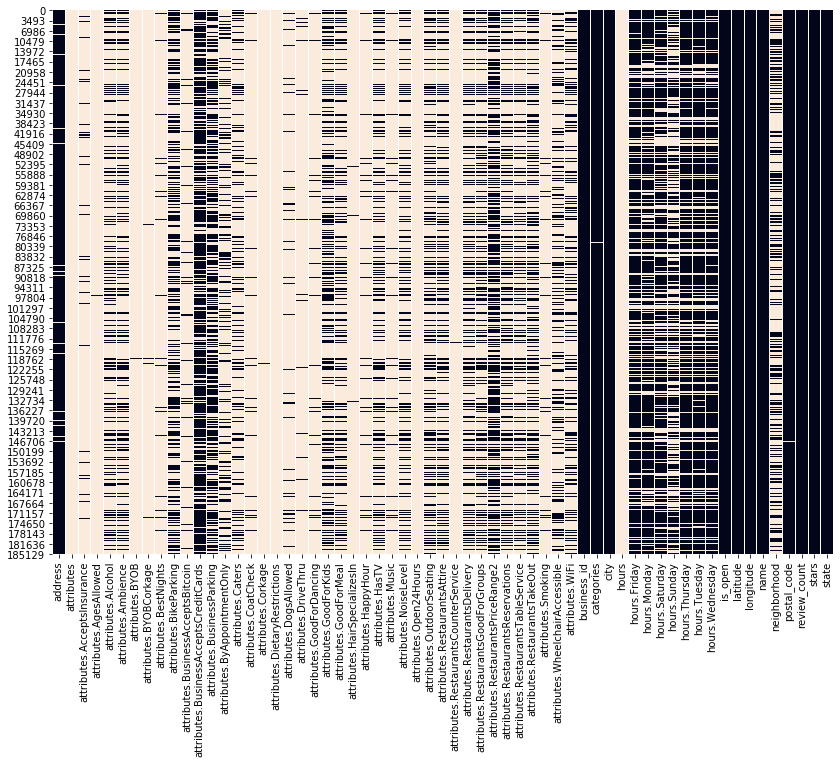

In [8]:
# Use a heatmap, pointplot, or other appropriate visualization here
figure, axes = plt.subplots(figsize = (14,10))
sns.heatmap(business_data.isnull(), cbar = False)

**From the heatma, we can see that there is no missing values in `business_id`, `is_open` , `name`,`review_count`, `stars`, and `state`. Further, we can see that most of columns have missing values. The cloumns `attributes` and `hours` have no any values at all, followed by `attributes.DietaryRestrictions`,`attributes.Open24Hours`, and `attributes.RestaurantsCounterService`.**

### Problem 5:

<span  style="color:purple; font-size:16px">Drop all columns that contain **only missing values** from `business_data`.</span>

In [9]:

business_data.drop(columns = ['attributes','hours'], axis = 1, inplace = True)

### Problem 6

<span  style="color:purple; font-size:16px">The `business_data` is not in a form that is convenient for analysis. Let's begin by cleaning up the variable names. </span>

Tasks:

1. Make all column names lowercase.
1. Replace all periods `.` with an underscore _

In [10]:

business_data.columns = business_data.columns.str.lower().str.replace('.','_')

### Problem 7:

<span  style="color:purple; font-size:16px">Let's now get rid of columns that we don't need right now. Perform the following transformation steps to the data.</span>

1. Drop all `attribute_*` columns except for the `attributes_happyhour` column.
1. Create a new column, called `open_on_weekends`, that is a 1 if the business is open on the weekend (has a non-null value for either `hours_saturday` or `hours_sunday`) and 0 otherwise.
1. Drop all of the `hours_*` columns after creating the `open_on_weekends` column.

In [11]:
# Drop all of the unwanted attributes columns
business_data.drop([i for i in business_data.columns if i.startswith('attributes') and 'happyhour' not in i], axis = 1,inplace = True)

In [12]:
# Create open_on_weekends
business_data['open_on_weekends'] = np.where((business_data['hours_saturday'].notnull() | business_data['hours_sunday'].notnull()), 1,0)

In [13]:
# Remove hours.* columns
business_data.drop([i for i in business_data.columns if i.startswith('hours_')], axis =1, inplace = True)

### Problem 8:

<span  style="color:purple; font-size:16px">Create a Pandas Series containing the proportion of business in the data by state. (For now, a *state* refers to any level of the `state` variable, not only states in the U.S.A.)</span>

In [14]:
# Number of businesses by state
state_counts = (business_data.state.value_counts())/len(business_data.state)
state_counts

AZ     0.299560
NV     0.189233
ON     0.171761
NC     0.076138
OH     0.072452
PA     0.058146
QC     0.046428
AB     0.040670
WI     0.026735
IL     0.010271
SC     0.004083
NYK    0.000864
NI     0.000711
IN     0.000536
OR     0.000382
BY     0.000318
ST     0.000239
CO     0.000228
C      0.000180
HE     0.000170
XGM    0.000122
NLK    0.000122
NY     0.000101
RP     0.000101
01     0.000058
CA     0.000042
VS     0.000037
NW     0.000021
O      0.000016
6      0.000016
G      0.000011
VT     0.000011
SG     0.000011
M      0.000011
MO     0.000011
AL     0.000011
B      0.000011
AR     0.000011
CMA    0.000011
WA     0.000011
PO     0.000005
DE     0.000005
4      0.000005
MA     0.000005
V      0.000005
TAM    0.000005
VA     0.000005
HH     0.000005
WHT    0.000005
XMS    0.000005
GA     0.000005
SP     0.000005
NE     0.000005
AG     0.000005
LU     0.000005
RCC    0.000005
10     0.000005
CC     0.000005
CRF    0.000005
BC     0.000005
HU     0.000005
11     0.000005
CS     0

<span  style="color:purple; font-size:16px">How many unique states are represented in the data? Are all of them in the United States of America? Do all of the levels of `state` make sense?</span>

#### Written Answer:

69 unique states are represented in the data. Not all of them in the United States of America, and there are some weird and strange values of states.

_____


### Problem 9:

<span  style="color:purple; font-size:16px">These data are fairly large! Let's focus on the data from a few key states. The goal in this exercise is to subset `business_data` to only contain businesses in the 5 states having the largest total number of businesses in the state. (Again, *state* does not need to correspond to a state in the U.S.A. but simply refers to a level of the `state` column.)</span>

Tasks:

1. Extract the 5 states from `state_counts` with the largest number of businesses
2. Subset `business_data` to only contain observations from these top-5 states

In [15]:

business_data = business_data.loc[business_data.state.isin(state_counts.head(5).index)]
business_data.head()

,address,attributes_happyhour,business_id,categories,city,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state,open_on_weekends
1,NaN,NaN,AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,0,35.960734,-114.939821,CK'S BBQ & Catering,NaN,89002,3,4.5,NV,1
3,211 W Monroe St,NaN,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,1,33.449999,-112.076979,Geico Insurance,NaN,85003,8,1.5,AZ,0
5,"20235 N Cave Creek Rd, Ste 1115",NaN,45bWSZtniwPRiqlivpS8Og,"Coffee & Tea, Food",Phoenix,1,33.671375,-112.030017,The Coffee Bean & Tea Leaf,NaN,85024,63,4.0,AZ,1
6,631 Bloor St W,NaN,9A2quhZLyWk0akUetBd8hQ,"Food, Bakeries",Toronto,0,43.664378,-79.414424,Bnc Cake House,Koreatown,M6G 1K8,7,4.0,ON,0
7,"3417 Derry Road E, Unit 103",NaN,6OuOZAok8ikONMS_T3EzXg,"Restaurants, Thai",Mississauga,1,43.712946,-79.632763,Thai One On,Ridgewood,L4T 1A8,7,2.0,ON,0


### Problem 10:

<span  style="color:purple; font-size:16px">Import the `territory_abbr.csv` data which contains a record for every U.S. state and territory. Use this data to **remove** businesses outside of the United States *by* performing an appropriate **merge** with `business_data`. Assign the remaining data to a DataFrame called `business_data_subset`.</span>

(Of course...you could probably figure out what state(s) need to be removed just by looking at them. The point is to demonstrate that you can use `merge()` and any necessary arguments to accomplish the task. Also...don't mess up your tidy data! Though not necessary for full credit, you may want to remove/modify columns that are not lowercase.)

In [16]:
# Read in data
us_data = pd.read_csv('data-sets/territory_abbr.csv')
us_data.head()

,State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [17]:

us_data.columns = us_data.columns.str.lower()
business_data_subset = business_data.merge(us_data, left_on = 'state', right_on = 'abbreviation', how = 'inner')

In [18]:
business_data_subset.drop('state_x', axis = 1,inplace = True)
business_data_subset.rename(columns = {'state_y':'state','abbreviation':'abbr'}, inplace = True)

In [19]:
business_data_subset.head()

,address,attributes_happyhour,business_id,categories,city,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,open_on_weekends,state,abbr
0,NaN,NaN,AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,0,35.960734,-114.939821,CK'S BBQ & Catering,NaN,89002,3,4.5,1,Nevada,NV
1,703 N Rancho Dr,NaN,hTzcHtk4-0QJnFUbkKpd5Q,"Shopping, Fashion, Department Stores",Las Vegas,1,36.178348,-115.176916,Citi Trends,NaN,89106,4,4.0,0,Nevada,NV
2,1549 N Rancho Dr,NaN,UwIpS9UKsPiKAv1fiEYhqg,"Financial Services, Check Cashing/Pay-day Loan...",Las Vegas,1,36.188386,-115.186124,Nevada Title And Payday Loans,NaN,89106,4,1.0,1,Nevada,NV
3,"3940 Martin Luther King Blvd, Ste 101",NaN,vJIuDBdu01vCA8y1fwR1OQ,"American (Traditional), Food, Bakeries, Restau...",Las Vegas,0,36.192284,-115.159272,CakesbyToi,NaN,89106,3,1.5,1,Nevada,NV
4,NaN,NaN,YZCHr68c5aEVHz0bkq9K2g,"Home Services, Masonry/Concrete, Professional ...",Las Vegas,1,36.260816,-115.171130,Park Stone Pavers,NaN,89031,20,5.0,0,Nevada,NV


<span  style="color:purple; font-size:16px">How many unique U.S. states are left in the data?</span>

In [20]:

business_data_subset.state.value_counts()

Arizona           56495
Nevada            35688
North Carolina    14359
Ohio              13664
Name: state, dtype: int64

**4 unique U.S. states are left in the data.**

_____

## 2 - Analysis

---

### Problem 11: 

<span  style="color:purple; font-size:16px">Do businesses with more reviews tend to have higher ratings? </span> 

<span  style="color:purple; font-size:16px">To help answer this question, use `business_data` to create *side-by-side notched boxplots* to visualize the relationship between the number of reviews left for the business (`review_count`, y-axis) and the rating of the business (`stars`, x-axis).</span> 
    
<span  style="color:purple; font-size:16px">**Note: use `ax.set_yscale('log')` to set the scale of the y-axis to be logarithmic due to extreme variation in the number of reviews left for the businesses. This means you must specify a figure and axes object using `fig, ax = plt.subplots(figsize=(10, 10))`**</span>
    
<span>Make sure to use appropriate axes labels and include an appropriate title. Make the figure 10 units tall and 10 units wide.</span>

Text(0, 0.5, 'Review Count')

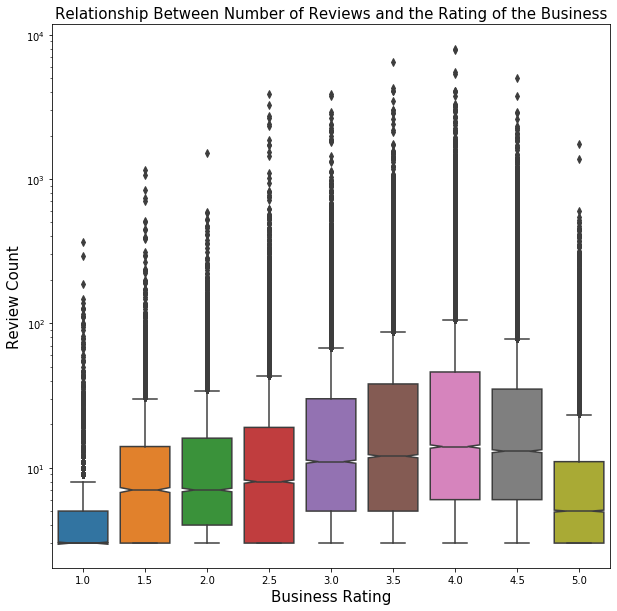

In [21]:

fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data = business_data,
           y = 'review_count',
           x = 'stars',
           notch = True)
ax.set_yscale('log')
ax.set_title('Relationship Between Number of Reviews and the Rating of the Business', fontsize = 15)
ax.set_xlabel('Business Rating',fontsize = 15)
ax.set_ylabel('Review Count', fontsize =15)

<span  style="color:purple; font-size:16px">Describe what you see in the plot and formulate a hypothesis about why the relationship between these variables looks the way it does.</span>

#### Written Answer:

From the above graph, we can see that the rating shows a gradually increase pattern as the number of review count get bigger until the rating reach 4.0, the decreases. My assumption is that Yelp users will aggressively provide reviews proportionate to the rating. However, once they have enough number of higher ratings(such as 5.0), they would less likely to show similar frequency of review activity.

_____

### Problem 12:

<span  style="color:purple; font-size:16px">The `categories` column of `business_data_subset` contains a *comma separated* list of various keyword categories for each business. Use an appropriate Python data structure to iterate over every row of the data and determine all of the unique categories as well as the number of times each category appears, sorted from most common category to least common category.</span>

Your result should look like the following:

<pre>
Restaurants                  234
Shopping                     173
Home Services                132
Food                         120
Health & Medical              92
.
.
.

In [22]:
# Your code here
full_list=[]
for i in range(len(business_data_subset)):
    for j in str(business_data_subset.loc[i,'categories']).split(','):
            full_list.append(j)
            
categories_data = pd.Series(full_list).str.strip().value_counts()
categories_data

Restaurants             27708
Shopping                19978
Home Services           15731
Food                    14051
Beauty & Spas           12980
                        ...  
Drive-Thru Bars             1
Czech                       1
Hearing Aids                1
Makerspaces                 1
Hong Kong Style Cafe        1
Length: 1261, dtype: int64

<span  style="color:purple; font-size:16px">How many distinct categories are in `business_data_subset`?</span>

In [23]:
# Number of distinct categories equal to the number of rows
len(categories_data)

1261

### Problem 13:

<span  style="color:purple; font-size:16px">For this question, we want to see if we can use the `categories` variable from the `business_data_subset` table to extract the records belonging to **food establishments** - any place that someone could go to get a freshly prepared meal.</span>

<span  style="color:purple; font-size:16px">Create a copy of the Pandas DataFrame called `food_establishments` which contains all business in `business_data_subset` that contain either *dining* or *restaurant* in their list of categories. (Make sure to ignore case.) How many food establishments are captured using this method?</span>

Hint: This can be accomplished in at least two ways. No reasonable method is bad! Create a new variable and use it to filter observations or directly subset the data. Your choice!

In [24]:

food_establishments = business_data_subset[business_data_subset.categories.str.lower().str.strip().str.contains('dining|restaurant', na=False, regex = True)]
len(food_establishments)

27724

### Problem 14:

<span  style="color:purple; font-size:16px">Using the `food_establishments` table, create a table with `stars` as the index, `state` as the columns, and the conditional `stars` distribution of food establishments for each `state` as values.</span>

<span  style="color:purple; font-size:16px">Include the marginal `stars` distribution in your table by using the appropriate `margins` argument. Create a valid conditional `stars` distribution for each state using the `normalize = 'columns'` argument.</span>

You can check that you have successfully create valid conditional `stars` distributions for each state by verifying each column sums to 1. 

Your final table should look similar to the table below with the appropriate values imputed for `val`.

| state  	|  AZ 	| NV  	| NC  	| OH  | All |
|---	|---	|---	|---	|---  |---  |
|   stars 	|
|   1 	|   val	|  val 	|  val 	| val   | val    |
|   1.5	|   val	|  val	|  val 	| val   | val    |
|   2	|   val	|  val 	|  val 	| val   | val    |
|   2.5	|   val	|  val	|  val 	| val   | val    |
|   3	|   val	|  val 	|  val 	| val   | val    |
|   3.5	|   val	|  val	|  val 	| val   | val    |
|   4	|   val	|  val 	|  val 	| val   | val    |
|   4.5	|   val	|  val 	|  val 	| val   | val    |
|   5	|   val	|  val 	|  val 	| val   | val    |

In [25]:

food_establishments_state = pd.crosstab(index=food_establishments['stars'],
            columns = food_establishments['abbr'], 
            values = food_establishments['review_count'],
            aggfunc = 'count',
            normalize = 'columns', 
            margins = True)
food_establishments_state

abbr,AZ,NC,NV,OH,All
stars,,,,,
1.0,0.006136,0.009119,0.003765,0.012701,0.007142
1.5,0.024274,0.029998,0.022862,0.026196,0.025105
2.0,0.064248,0.062155,0.062668,0.061520,0.063014
2.5,0.107562,0.106791,0.103685,0.109149,0.106695
3.0,0.176051,0.183345,0.166218,0.167494,0.172955
3.5,0.232990,0.235661,0.237090,0.237150,0.235247
4.0,0.248150,0.234941,0.246369,0.240524,0.244301
4.5,0.114781,0.111831,0.126950,0.118674,0.118309
5.0,0.025808,0.026158,0.030393,0.026593,0.027233


### Problem 15:

<span  style="color:purple; font-size:16px">Is there a difference in the rating distribution (`stars`) of food establishments by state?</span>

<span  style="color:purple; font-size:16px">Use the table you created in the previous problem to create an appropriate visualization that helps you to answer the above question.</span>

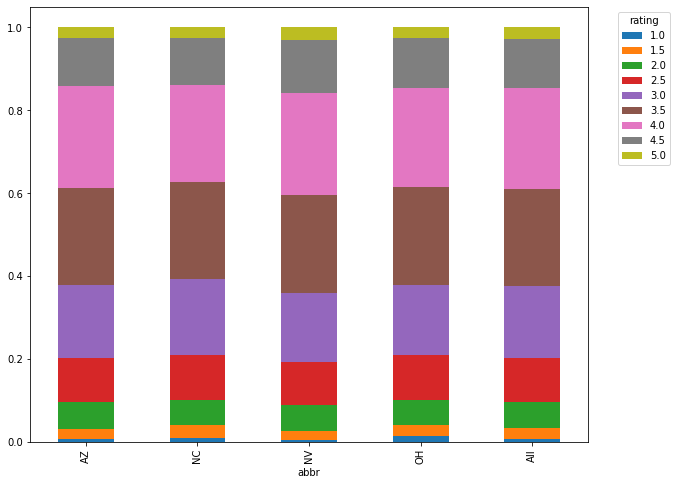

In [26]:

food_establishments_state.T.plot(kind='bar',stacked=True, figsize = (10,8))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), ncol=1, title = 'rating')

From the graph, we can see that there is no significant difference in the rating distribution of food establishments by the 4 states.

_____

### Problem 16:

<span  style="color:purple; font-size:16px">Using the `food_establishments` data, calculate the *median*, *mean*, *standard deviation*, *minimum*, *maximum*, and *number of observations* for food establishments with/without a *Happy Hour* by using the `attributes_happyhour` variable.</span>

In [27]:

food_establishments.groupby('attributes_happyhour')[['review_count','stars']].agg({'min','max','mean','median','std','count'})

review_count                                          stars                   \
                              max median        mean count min         std   max median      mean   
attributes_happyhour                                                                                
False                        3975     64  177.542529   435   3  338.276705   5.0    4.0  3.678161   
True                         3048     78  161.087341  3057   3  252.562845   5.0    3.5  3.505561   

                                           
                     count  min       std  
attributes_happyhour                       
False                  435  1.5  0.655432  
True                  3057  1.0  0.620838

<span  style="color:purple; font-size:16px">Describe any differences you find for food establishments having a *Happy Hour* and those that do not. Do food establishments with a happy hour seem to typically be higher or lower rated than food establishments without a happy hour? Do most food establishments offer a happy hour?</span>

#### Written Answer:

+ Based on the information above, we can see that food establishment with a happy hour seem to typically be lower rated than without a happy hour. 
+ Yes, most food establishments offer a happy hour.

_____

### Problem 17:

<span  style="color:purple; font-size:16px">Let's investigate differences in food establishments with/without a Happy Hour using an appropriate visualization.</span>
    
<span  style="color:purple; font-size:16px">First, create a new variable for the `food_establishments` table called `binned_review_count` that bins the `review_count` variable as: 
    
 + '[0-10]' = having between 0 and 10 reviews inclusive
 + '(10,100]' = having between 10 and 100 reviews
 + '(100,1,000]' = having between 100 and 1,000 reviews
 + '1,000 +` = more than one thousand reviews.
</span>

<span  style="color:purple; font-size:16px">Create a side-by-side violin plot with `binned_review_count` on the y-axis, `stars` on the x-axis, and allow the rating distributions to differ for establishments **with and without a Happy Hour** by using the `split = True` argument. As always, provide an appropriate title and axes labels.</span>

In [28]:

food_establishments['binned_review_count'] = pd.cut(food_establishments['review_count'],
                                                    bins = [0,10,100,1000,np.inf], 
                                                    labels= ['[0-10]','(10,100]','(100,1,000]','1,000+'])

/Users/tt/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


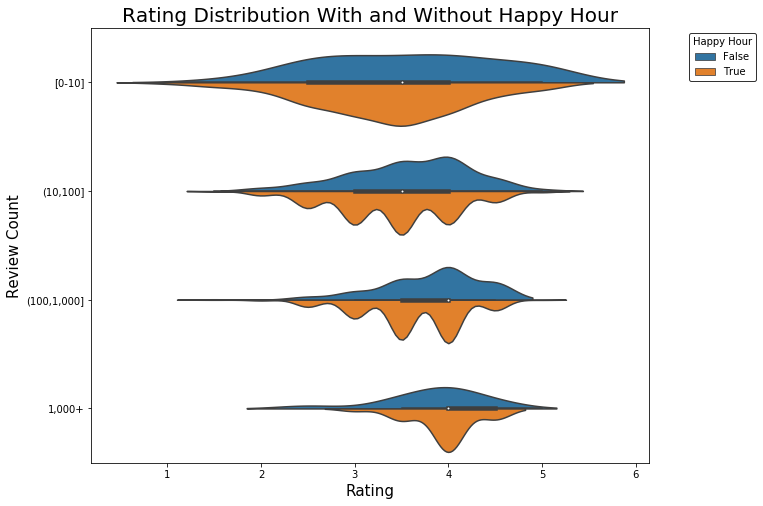

In [29]:
fig, ax = plt.subplots(figsize = (10,8))

sns.violinplot(data = food_establishments,
               x = 'stars',
               y = 'binned_review_count',
               hue = 'attributes_happyhour',
               split = True)
ax.set_title('Rating Distribution With and Without Happy Hour', fontsize = 20)
ax.set_xlabel('Rating', fontsize = 15)
ax.set_ylabel('Review Count', fontsize = 15),
plt.legend(loc = 'upper right', bbox_to_anchor=(1.2, 1), title = 'Happy Hour', facecolor = 'white', edgecolor = 'black')

Describe what you see in the plot.

#### Written Answer:

From the graph, we can see that the split distribution of without offering happy hour tend to be having better rate than food establishments offer happy hour in review count of (10,100] and (100,1000]. 


____


### Problem 18:

<span  style="color:purple; font-size:16px">Suppose you work at Yelp. You have been tasked with a new initiative to create a new award for the highest performing food establishments represented on the Yelp platform. The team at Yelp has determined that any food establishment that has both the highest `stars` rating **AND** the largest total number of reviews (`review_count`) in their city *deserves* the **Best Local Food Establishment Award**. You have been tasked with writing Python code that can determine which food establishments in a data set deserve this new prestigious award.</span>

<span  style="color:purple; font-size:16px">For this exercise, create a DataFrame containing all the food establishments in the `food_establishments` data that deserve **Best Local Food Establishment Award** for every city/state combination (to avoid issues with cities that have the same name). The final table that you are to create, called `best_food_establishments`, should provide the `name`, `city`, `state`, `review_count`, and `stars` ratings of all of the food establishments that deserve the award.</span>

Important Notes: There are some slight variations in some city names like: LasVegas, Las Vegas, las vegas. You do not need to worry about cleaning this up before performing your analysis, this is really a proof-of-concept for your team. Also, some cities will have no food establishments that deserve to receive this award as it is possible that the food establishment with the largest number of reviews **does not** have the highest rating in the city.

In [30]:

best_food_establishments = food_establishments.groupby(['city','state'])['stars','review_count','name'].max().reset_index()

/Users/tt/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [31]:
best_food_establishments.head()

,city,state,stars,review_count,name
0,Ahwatukee,Arizona,4.0,283,My Wine Cellar
1,Amherst,Ohio,5.0,77,Ziggy's Pub & Restaurant
2,Anthem,Arizona,4.5,257,Tru Burger Co.
3,Auburn Township,Ohio,4.5,24,Sirna's Pizza
4,Auburn Twp,Ohio,2.5,9,Auburn Inn


### Problem 19: (10 points)

<span  style="color:purple; font-size:16px">Subsequent questions involve the `data-sets/yelp_academic_dataset_review.csv` data. Let's investigate the relationship between the data for businesses remaining in `business_data` (we subset the data in a previous problem, you can use it as is) and the `data-sets/yelp_academic_dataset_review.csv` data. One thing that would interesting to know is, does it appear that we have all the reviews for each business? For example: if we see a business in `business_data` has 14 reviews, does the review table contain all 14 of those reviews?</span>

<span  style="color:purple; font-size:16px">To determine whether this is the case:
    
  + Import the `data-sets/yelp_academic_dataset_review.csv` data.
  + Subset the reviews data to only contain records for businesses in the `business_data` table.
  + Use `groupby()` to get the counts of reviews for every unique business (by `business_id`) in the reviews data.
  + Perform an appropriate join to the `business_data` table to create a DataFrame containing three columns: 
      1. `business_id`
      1. `number_reviews` - the number of reviews for that particular business you found in the review table, 
      1. `review_count` - the number of reviews listed in the `food_establishments` table
  + Create a new column `abs_diff` containing the absolute value of the difference in the number of reviews for each business in `business_data` and number of reviews from the reviews table.
  + Create a plot that helps us see the extent of any disparities between the number of reviews in the review data and the number of reviews stated in the `business_id` table.
  + Use the `describe()` method to numerically describe the extent of any disparities between the number of reviews in the `review_data` and the number of reviews stated in the `business_id` table in the `review_count` field.
</span>

In [32]:
# Import the review data

review_data = pd.read_csv(r'data-sets/yelp_academic_dataset_review.csv')
review_data.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0.0,x7mDIiDB3jEiPGPHOmDzyw,2.0,The pizza was okay. Not the best I've had. I p...,0.0,msQe1u7Z_XuqjGoqhB0J5g
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0.0,dDl8zu1vWPdKGihJrwQbpw,5.0,I love this place! My fiance And I go here atl...,0.0,msQe1u7Z_XuqjGoqhB0J5g
2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1.0,LZp4UX5zK3e-c5ZGSeo3kA,1.0,Terrible. Dry corn bread. Rib tips were all fa...,3.0,msQe1u7Z_XuqjGoqhB0J5g
3,elqbBhBfElMNSrjFqW3now,0,2011-02-25,0.0,Er4NBWCmCD4nM8_p1GRdow,2.0,Back in 2005-2007 this place was my FAVORITE t...,2.0,msQe1u7Z_XuqjGoqhB0J5g
4,Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0.0,jsDu6QEJHbwP2Blom1PLCA,5.0,Delicious healthy food. The steak is amazing. ...,0.0,msQe1u7Z_XuqjGoqhB0J5g


In [33]:

merged_data = pd.merge(review_data,business_data_subset, on='business_id',how='left')

In [34]:
number_reviews = merged_data.groupby('business_id')['review_id'].count().reset_index().rename(columns={'review_id':'number_reviews'})

In [35]:
number_reviews.head()

,business_id,number_reviews
0,--1UhMGODdWsrMastO9DZw,24
1,--6MefnULPED_I942VcFNA,39
2,--7zmmkVg-IMGaXbuVd0SQ,54
3,--8LPVSo5i0Oo61X01sV9A,4
4,--9QQLMTbFzLJ_oT-ON3Xw,11


In [36]:
food_reviews = pd.merge(food_establishments[['business_id','review_count']], number_reviews, on='business_id',how='left')

In [37]:
food_reviews.head()

,business_id,review_count,number_reviews
0,AjEbIBw6ZFfln7ePHha9PA,3,3
1,vJIuDBdu01vCA8y1fwR1OQ,3,3
2,kgffcoxT6BQp-gJ-UQ7Czw,13,13
3,0jtRI7hVMpQHpUVtUy4ITw,242,241
4,JJEx5wIqs9iGGATOagE8Sg,4,4


In [38]:
# Create the new column `abs_diff`
food_reviews['abs_diff'] = abs(food_reviews['review_count']-food_reviews['number_reviews'])

In [39]:
# The extent of any disparities
extent_disparity = food_reviews.loc[food_reviews['abs_diff']>0,'abs_diff'].value_counts()
extent_disparity

1    1189
2      77
3      11
6       2
5       2
9       1
7       1
Name: abs_diff, dtype: int64

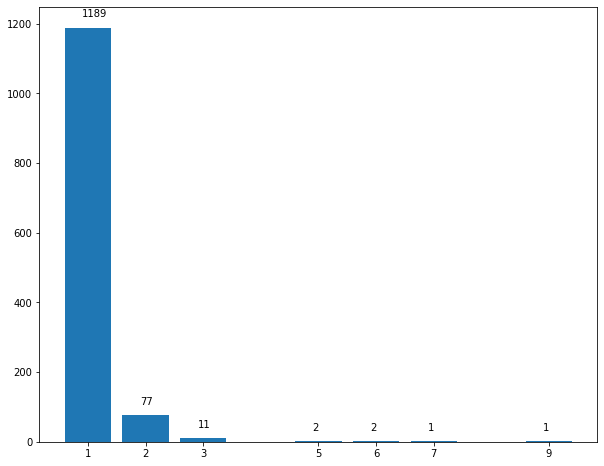

In [40]:
# Plot the disparities
fig, ax=plt.subplots(figsize = (10,8))
bars = plt.bar(extent_disparity.index, extent_disparity, width=0.8)
ax.set_xticks(extent_disparity.index)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.3, yval + 30, yval)

In [41]:
food_reviews.describe()

,review_count,number_reviews,abs_diff
count,27724.000000,27724.000000,27724.000000
mean,95.902034,95.902900,0.051003
std,219.118224,219.111177,0.253097
min,3.000000,3.000000,0.000000
25%,10.000000,10.000000,0.000000
50%,31.000000,31.000000,0.000000
75%,96.000000,96.000000,0.000000
max,7968.000000,7968.000000,9.000000


Describe what you see in the plot and the output from `describe()`. Does it appear that we have the all or most of the reviews for every business in the `business_data` table?

#### Written Answer:

+ From the plot, we can see that there are 1189 rows that the difference in the number of reviews for each business in business_data and number of reviews from the reviews table are 1, 77 rows that the difference are 2, 11 rows that difference are 3, 2 rows that difference are 5 and 6, and 1 row that the difference is 7 and 9.
+ The mean of abs_diff is 0.05, and std is 0.25.
+ It appear that we have most of the reviews for every businness in the table.



---

## Wrapping up

In this section of the Final Project, you will be focused on analyzing the Yelp users and the reviews they leave. Unlike the previous part, you will not be guided through each step and must decide how best to proceed.

Your analyses will involve the following 3 tables:

+ `yelp_academic_dataset_review.csv` - contains a subset of Yelp reviews with a `business_id` indicating what business the review is for and a `user_id` to identify the user leaving the review.

+ `yelp_academic_dataset_user.csv` - contains a subset of Yelp users identified by `user_id`

+ `yelp_academic_dataset_business.csv` - contains information about a subset of businesses having at least one Yelp review and every distinct business has a unique `business_id`. This is the table that we have been analyzing in Problems 1-19. 


In [42]:
# Import the user data table

user_data = pd.read_csv(r'data-sets/yelp_academic_dataset_user.csv')
user_data.head(5)

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,2.00,0,0,0,0,0,0,0,0,0,0,0,0,None,0,None,0,Susan,1,0,lzlZwIpuSWXEnNS91wxjHw,2015-09-28
1,5.00,0,0,0,0,0,0,0,0,0,0,0,0,None,0,None,0,Daipayan,2,0,XvLBr-9smbI0m_a7dXtB7w,2015-09-05
2,4.00,0,0,0,0,0,0,0,0,0,0,0,0,None,0,None,0,Andy,1,0,QPT4Ud4H5sJVr68yXhoWFw,2016-07-21
3,4.05,0,0,0,0,0,0,0,0,0,0,0,0,None,0,None,0,Jonathan,19,0,i5YitlHZpf0B3R0s_8NVuw,2014-08-04
4,3.00,0,0,0,0,0,0,0,0,0,0,0,0,None,0,None,0,Shashank,3,0,s4FoIXE_LSGviTHBe8dmcg,2017-06-18


### Problem 20: Time Based Analysis

<span  style="color:purple; font-size:16px">The `review_data` table contains a column `date` representing the date the review was created.</span>

Chose **ONE** of the questions below and use the `review_data` to answer.

1. Are more reviews posted during certain days of the week? What about certain months of the year? What patterns can you find about when reviews are posted? Draw a suitable plot.

1. Do reviews made on certain days of the week or certain months of the year tend to be higher/lower rated? What relationship can you find between the `stars` ratings of a review and when the reviews was posted? Draw a suitable plot.

#### Question 1

In [43]:
# Check the type of column date
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5996998 entries, 0 to 5996997
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   business_id  object 
 1   cool         int64  
 2   date         object 
 3   funny        float64
 4   review_id    object 
 5   stars        float64
 6   text         object 
 7   useful       float64
 8   user_id      object 
dtypes: float64(3), int64(1), object(5)
memory usage: 411.8+ MB


In [44]:
# Change the column date type to datetime
review_data['date'] = pd.to_datetime(review_data['date'], errors='coerce')

In [45]:
review_data[['date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5996998 entries, 0 to 5996997
Data columns (total 1 columns):
 #   Column  Dtype         
---  ------  -----         
 0   date    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 45.8 MB


Text(0.5, 1.0, 'Number of Reviews Posted on Days of Week')

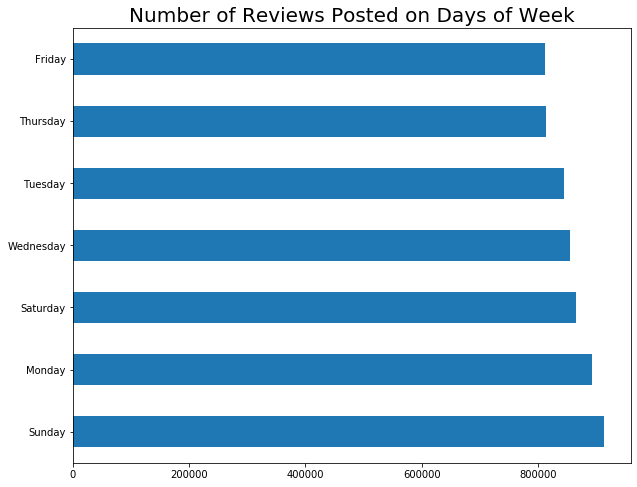

In [46]:
# Number of reviews posted on the days of week 
fig, ax = plt.subplots(figsize = (10,8))
review_data['date'].dt.day_name().value_counts().plot(kind = 'barh')
ax.set_title('Number of Reviews Posted on Days of Week', fontsize = 20)

Text(0.5, 1.0, 'Number of Reviews Posted on Months of Year')

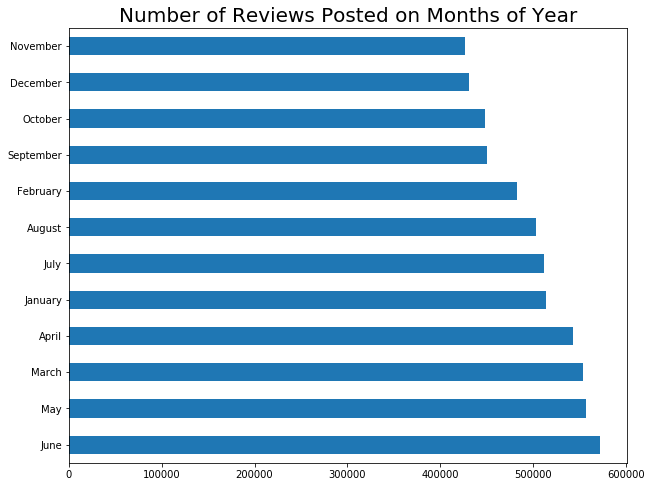

In [47]:
# Number of reviews posted on the months of the year
fig, ax = plt.subplots(figsize = (10,8))
review_data['date'].dt.month_name().value_counts().plot(kind = 'barh')
ax.set_title('Number of Reviews Posted on Months of Year', fontsize = 20)

In [48]:
# Set column date as index
review_data.set_index('date', inplace = True)

Text(0, 0.5, 'Number of Post')

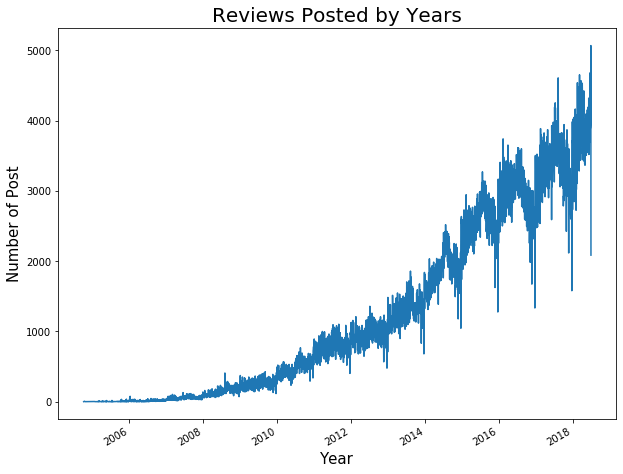

In [49]:
# Plot the number of reviews posted based on the date
fig,ax=plt.subplots(figsize=(10,8))
review_data.index.value_counts().plot()
ax.set_title('Reviews Posted by Years', fontsize = 20)
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Number of Post', fontsize = 15)

<span  style="color:purple; font-size:16px">Provide a brief explanation of your conclusions.</span>

#### Written Answer:

From all the graphs, we can see that more reviews posted during Sunday, Mondy, and Saturday, and June of the year. We can also tell that the increase pattern of the number reviews posted from begining of year to summer time, and decreases pattern after July/August.
____



### Problem 21: Text Based Analysis

<span  style="color:purple; font-size:16px">The `review_data` table contains a column `text` containing the full text of the review. Use these data to answer one of the questions below.</span>

Chose **ONE** of the questions below and use the `review_data` to answer.

1. Can you classify a review as having a *positive* or *negative* sentiment? If so, select five particular businesses (by `business_id`) and compare the business's average `stars` rating from the `business_data` to the proportion of reviews you have identified as having `positive` or `negative` sentiment for those particular businesses. Draw a suitable plot.

1. Do reviews with exclamation points seem to be either very highly rated or very low rated? Determine the `stars` distribution as a function of the number of exclamation points used in the review. Draw a suitable plot.


In [50]:
# Pipeline function part 1: Create function to pre-process review

def pre_process_review(review):
    
    # Cast to a Series
    review = pd.Series(review)
    
    # process review, return DataFrame
    clean_review = review.str.lower().str.replace(pat = r"[!.'',]", repl = '')
    clean_review = clean_review.str.split(expand = True).transpose()
    clean_review.columns = ['word']
    return clean_review

In [51]:
# Pipeline function part 2: remove stopwords

def remove_stopwords(cleaned_review):
    
    # Read-in stopwords
    stopwords = pd.read_csv(r"data-sets/lexicons/stopwords.csv")
    
    # Perform Anti-Join and return processed DataFrame
    stop_merge = cleaned_review.merge(stopwords, 
                                how = 'left', 
                                left_on = 'word', 
                                right_on = 'stopwords', 
                                indicator = True)
    filt = stop_merge['_merge'] == 'left_only'
    return stop_merge[filt][['word']]

In [52]:
# Pipeline function part 3: add sentiment

def get_sentiment(cleaned_reviews):
    bing_lexicon = pd.read_csv(r"data-sets/lexicons/bing.csv")
    cleaned_reviews = cleaned_reviews.merge(bing_lexicon,
                                            how = 'left',
                                            on = 'word')
    cleaned_reviews['sentiment'].fillna('neutral', inplace = True)
    return cleaned_reviews

# Test
# get_sentiment(remove_stopwords(pre_process_review(review1)))

In [53]:
# Pipeline function part 4: count sentiment

def extract_sentiment_count(sentiment_df, sentiment):
    filt = sentiment_df['sentiment'] == sentiment
    num_count = sentiment_df.loc[filt].shape[0]
    return num_count

In [54]:
# Write function to process entire review

def process_review_sentiment(review, verbose = False):
    review = get_sentiment(remove_stopwords(pre_process_review(review)))
    pos_count = extract_sentiment_count(review, 'positive')
    neg_count = extract_sentiment_count(review, 'negative')
    return pos_count, neg_count

In [55]:
# Your code here
business_id_samples = review_data.business_id.sample(5).to_list()
business_id_samples

['UBj-25LU5dxJ9meb-TPc9w',
 'OY0-hYJ2q6WiAqhYnCZZ0w',
 'Iu_uZRVStxL1GuhDXaEJHA',
 'pP71Ir_U2uKU10f4vwA7tA',
 'apdb7MGnmnx6nGWBJ0ch_g']

In [56]:
business_samples = review_data.loc[review_data.business_id.isin(business_id_samples)]

In [57]:
business_samples.reset_index(inplace = True)

In [58]:
# Wrap-up all our processing steps into a single function

def add_sentiment(df, review_col):
    
    sentiments = pd.DataFrame.from_records(df[[review_col]].apply(process_review_sentiment, axis = 1).to_list())
    sentiments.columns = ['num_positive', 'num_negative']
    df = pd.concat([df, sentiments], axis = 'columns')
    return df

In [59]:
business_samples = add_sentiment(business_samples, 'text')

Text(0, 0.5, 'Average')

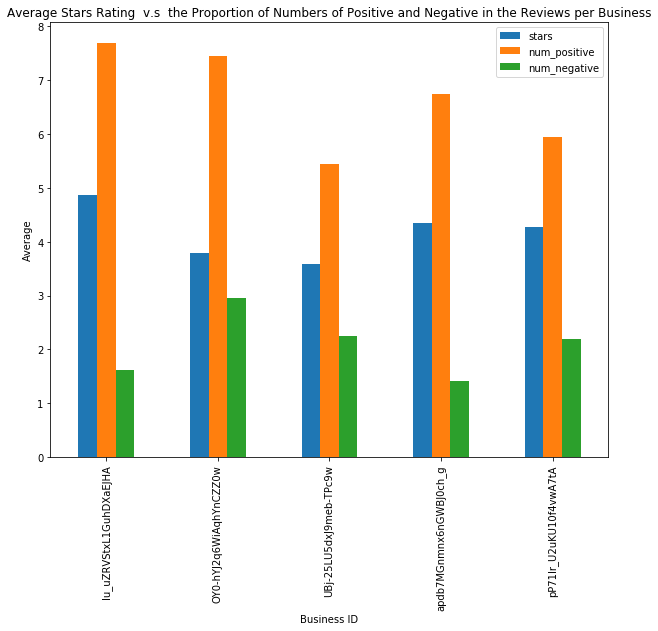

In [60]:
# Compare the difference
fig, ax = plt.subplots(figsize = (10,8))
business_samples.groupby('business_id')[['stars','num_positive','num_negative']].mean().plot(kind= 'bar', ax =ax)
ax.set_title('Average Stars Rating  v.s  the Proportion of Numbers of Positive and Negative in the Reviews per Business')
ax.set_xlabel('Business ID')
ax.set_ylabel('Average')

<span  style="color:purple; font-size:16px">Provide a brief explanation of your conclusions.</span>

#### Written Answer:

From the above graph, we can see that the greater the difference of the amount of positive and negative terms yeids a higher rating.

____

### Problem 22: Analysis of Users

<span  style="color:purple; font-size:16px">Create a function that accepts at least a `user_id` as input. This function use the `yelp_academic_dataset_user.csv` data as well as the `yelp_academic_dataset_review.csv` or `yelp_academic_dataset_business.csv` tables as necessary.</span>

<span  style="color:purple; font-size:16px">The function should automatically process the data relevant to the `user_id` passed and create at least one plot annotated with relevant, interesting information about the user that best answers the following questions:</span>

**What types of businesses has the user reviewed? Summarize the users review ratings by business category.**

Tip: It is OK if the results of your function are not very interesting for users with only a small number of reviews but your function should produce something reasonable for any `user_id` that may be passed.

In [61]:
# Function by using review data and business data.
def user_review_business(user_id):
    full_list2=[]
    combined_reviews = pd.merge(review_data,business_data, on='business_id',how='left') 
    for i in range(len(combined_reviews[combined_reviews['user_id']==user_id])):
        for j in str(combined_reviews[combined_reviews['user_id']==user_id].loc[i,'categories']).split(','):
            full_list2.append(j)
            
    d = pd.Series(full_list2).str.strip().value_counts()

    fig,ax=plt.subplots(figsize=(10,8))
    d.plot(kind = 'bar', ax=ax)
    ax.set_title(f"The Business Categories Reviews that the User '{user_id}' Posted")
    ax.set_xlabel('Business Categories')
    ax.set_ylabel('Count')

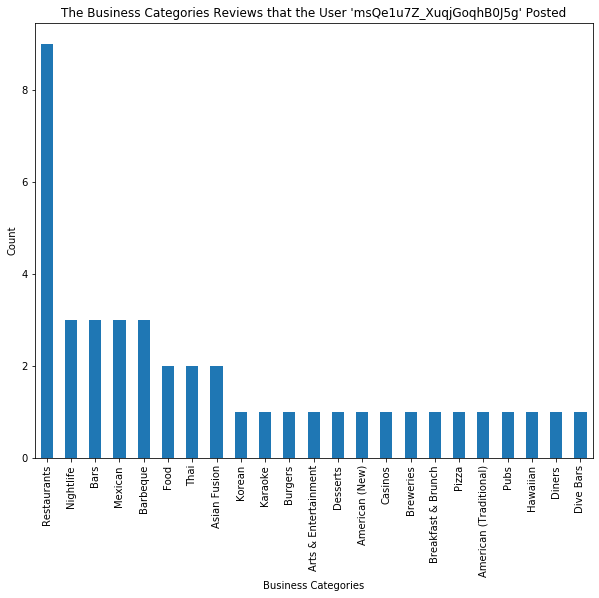

In [62]:
user_review_business('msQe1u7Z_XuqjGoqhB0J5g')

In [63]:
# Function by using user data, review data and business data.
def user_review_business2(user_id):
    full_list2=[]
    a = review_data.merge(user_data, on='user_id',how='inner')
    b = a.merge(business_data, on = 'business_id', how='left')
    c = b.loc[b['user_id']==user_id]
    for i in range(len(c)):
        for j in str(c.loc[i,'categories']).split(','):
            full_list2.append(j)
            
    d = pd.Series(full_list2).str.strip().value_counts()

    fig,ax=plt.subplots(figsize=(10,8))
    d.plot(kind = 'bar', ax=ax)
    ax.set_title(f"The Business Categories Reviews that the User '{user_id}' Posted")
    ax.set_xlabel('Business Categories')
    ax.set_ylabel('Count')

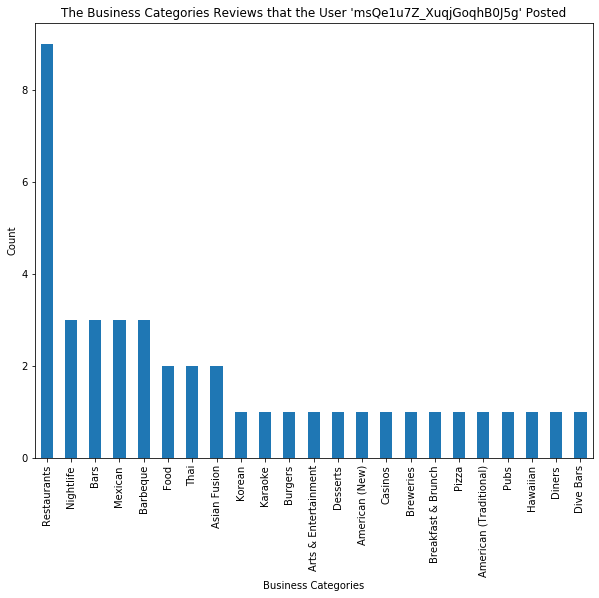

In [64]:
user_review_business2('msQe1u7Z_XuqjGoqhB0J5g')